In [19]:
import csv
import numpy
import matplotlib.pyplot as plt
import cv2

In [20]:
from sklearn.preprocessing import normalize

In [21]:
reader = csv.reader(open("DATASET.csv", "r"), delimiter=",")

In [22]:
x = list(reader)

In [23]:
result =numpy.array(x).astype("float")

In [24]:
pix=result[:,1:]

In [25]:
#pix = normalize(pix, axis=0, norm='max')

In [26]:
pix[2]

array([ 0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.172  ,  0.145  ,  0.     ,  0.     ,
        0.     ,  0.     ,  0.     ,  0.     ,  0.     ,  0.  

In [27]:
import numpy


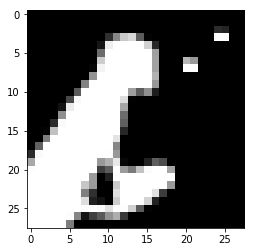

In [28]:
%matplotlib inline
plt.imshow(pix[6].reshape([28,28]),cmap="gray")


In [29]:
label=result[:,[0]]

In [30]:
label.shape

(27196, 1)

In [31]:
label[7]

array([ 1.])

In [32]:
%matplotlib inline

In [33]:
nl=pix[0].reshape([28,28])
label[0]

array([ 0.])

In [34]:
label.size

27196

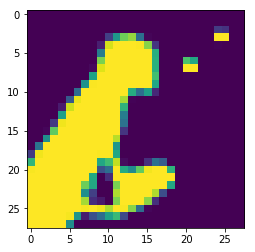

In [35]:
plt.imshow(nl)

In [36]:
import tensorflow as tf
import numpy as np

In [19]:
def init_weights(shape):
    init_random_dist = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(init_random_dist)

In [20]:
def init_bias(shape):
    init_bias_vals = tf.constant(0.1, shape=shape)
    return tf.Variable(init_bias_vals)

In [21]:
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

In [22]:
def max_pool_2by2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')

In [23]:
def convolutional_layer(input_x, shape):
    W = init_weights(shape)
    b = init_bias([shape[3]])
    return tf.nn.relu(conv2d(input_x, W) + b)

In [24]:
def normal_full_layer(input_layer, size):
    input_size = int(input_layer.get_shape()[1])
    W = init_weights([input_size, size])
    b = init_bias([size])
    return tf.matmul(input_layer, W,name="y_pred") + b

In [19]:
x = tf.placeholder(tf.float32,shape=[None,784],name="x")

In [20]:
y_true = tf.placeholder(tf.float32,shape=[None,2],name="y_true")

In [21]:
x_image = tf.reshape(x,[-1,28,28,1])

In [28]:
convo_1 = convolutional_layer(x_image,shape=[6,6,1,32])
convo_1_pooling = max_pool_2by2(convo_1)

In [29]:
convo_2 = convolutional_layer(convo_1_pooling,shape=[6,6,32,64])
convo_2_pooling = max_pool_2by2(convo_2)

In [30]:
convo_2_flat = tf.reshape(convo_2_pooling,[-1,7*7*64])
full_layer_one = tf.nn.relu(normal_full_layer(convo_2_flat,1024))

In [31]:
hold_prob = tf.placeholder(tf.float32,name="hold_prob")
full_one_dropout = tf.nn.dropout(full_layer_one,keep_prob=hold_prob)

In [32]:
y_pred = normal_full_layer(full_one_dropout,2)
tf.add_to_collection("y_pred", y_pred)

In [33]:
cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y_pred))

In [34]:
optimizer = tf.train.AdamOptimizer(learning_rate=0.0001)
train = optimizer.minimize(cross_entropy)

In [38]:
init = tf.global_variables_initializer()

In [39]:
label[0]
temp = [[0 for x in range(2)] for y in range(27196)] 

In [40]:
i=0
for i in range(27196):
    tr=int(label[i])
    temp[i][tr]=1

In [41]:
resultlabel =numpy.array(temp).astype("float")

In [42]:
resultlabel.shape

(27196, 2)

In [43]:
resultlabel[7]

array([ 0.,  1.])

In [44]:
import random

In [45]:
%matplotlib inline

In [43]:
model_path = "./Onlytwo.ckpt"

In [44]:
#tf.reset_default_graph()

Currently on step 5000
Accuracy is:
1.0




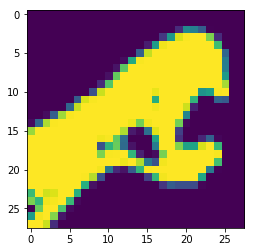

				
C


Currently on step 5000
Accuracy is:
1.0




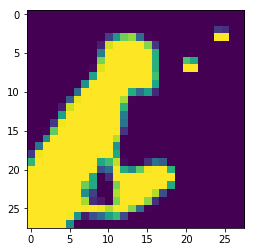

				
C


Currently on step 5000
Accuracy is:
1.0




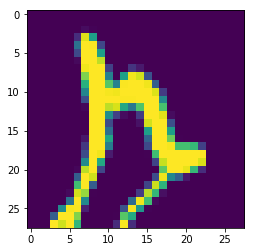

				
Y


Currently on step 5000
Accuracy is:
1.0




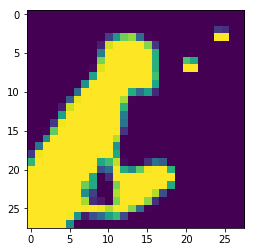

				
C


Currently on step 5000
Accuracy is:
1.0




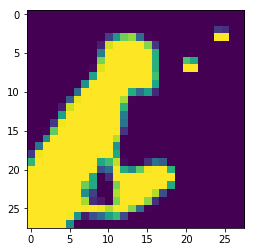

				
C




In [45]:
steps = 541
i=0
plt.ion()

with tf.Session() as sess:
    sess.run(init)
    uyz = tf.train.Saver()
    j=0
    for i in range(steps):
        
        
        batch_x =pix[j:j+50,:]
        batch_y=resultlabel[j:j+50][:]
        j=j+50
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y,hold_prob:0.5})
        
        # PRINT OUT A MESSAGE EVERY 100 STEPS   TRAINNING-9000 IMAGES & TESTING(ACCURACY) ON 18000 IMAGES
        
        if i%100==0 and i!=0:
            
            
            print('Currently on step 5000')
            print('Accuracy is:')
            # Test the Train Model
            matches = tf.equal(tf.argmax(y_pred,axis=1),tf.argmax(y_true,axis=1))
            acc = tf.reduce_mean(tf.cast(matches,tf.float32))
            print(sess.run(acc,feed_dict={x:pix[27000:27100,:],y_true:resultlabel[27000:27100][:],hold_prob:1.0}))
            savepath=uyz.save(sess,model_path)
            print('\n')
            ran=random.sample(range(27000,27100),1)
            testimage=pix[ran].reshape([28,28])
            ran[0]=ran[0]-27000
            re=tf.argmax(y_pred[ran],axis=0)
            plt.imshow(testimage)
            plt.show()
            print('\t\t\t\t')
            outp=sess.run(re,feed_dict={x:pix[27000:27100,:],y_true:resultlabel[27000:27100][:],hold_prob:1.0})
            if outp==0:
                print('C')
            else:
                print('Y')
            print('\n')
            
plt.ioff()


In [47]:
%matplotlib notebook
import numpy
import cv2
import matplotlib.pyplot as plt
import signal

In [48]:
from PIL import Image
img = Image.open('OUT.jpg')

In [49]:
img.size

(280, 180)

In [50]:
img=numpy.asarray(img)

In [51]:
dim=(28,28)
img=cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

In [52]:
img.shape

(28, 28)

In [53]:
img = normalize(img, axis=0, norm='max')

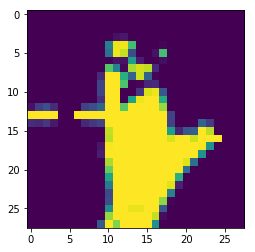

In [54]:
%matplotlib inline
plt.imshow(img)

In [55]:
img=numpy.asarray(img)

In [56]:
img=img.flatten()

In [57]:
li=[]

In [58]:
li.append(img)

In [59]:
img=numpy.asarray(li).astype("float")

In [60]:
img.shape

(1, 784)

In [61]:
pix.dtype

dtype('float64')

tf.reset_default_graph()
%matplotlib inline
plt.ion()
with tf.Session() as sess:
    saver = tf.train.import_meta_graph('NewMasked.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    y_true = graph.get_tensor_by_name("y_true:0")
    hold_prob = graph.get_tensor_by_name("hold_prob:0")
    y_pred=tf.get_collection("y_pred")[0]
    matches = tf.equal(tf.argmax(y_pred,axis=1),tf.argmax(y_true,axis=1))
    acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    print(sess.run(acc,feed_dict={x:pix[33000:47000,:],y_true:resultlabel[33000:47000][:],hold_prob:1.0}))
plt.ioff()

In [75]:
tf.reset_default_graph()

In [73]:
imga=img.reshape([28,28])

In [76]:
imga.shape

NameError: name 'imga' is not defined

In [62]:
import tensorflow as tf
tf.reset_default_graph()
%matplotlib inline
plt.ion()

with tf.Session() as sess:
    saver = tf.train.import_meta_graph('Onlytwo.ckpt.meta')
    saver.restore(sess,tf.train.latest_checkpoint('./'))
    graph = tf.get_default_graph()
    x = graph.get_tensor_by_name("x:0")
    y_true = graph.get_tensor_by_name("y_true:0")
    hold_prob = graph.get_tensor_by_name("hold_prob:0")
    y_pred=tf.get_collection("y_pred")[0]
    re=tf.argmax(y_pred[0],axis=0)
    outp=sess.run(re,feed_dict={x:img[0:1,:],y_true:resultlabel[6:7][:],hold_prob:1.0})
    #print(outp)
    if outp==0:
        print('C')
    else:  
        print('Y')
    #imga=img[0:1,:].reshape([28,28])
    #print(outp)
    #plt.imshow(imga)
   # print(alph)
    print('\n')
    #matches = tf.equal(tf.argmax(y_pred,axis=1),tf.argmax(y_true,axis=1))
    #acc=tf.reduce_mean(tf.cast(matches,tf.float32))
    #print(sess.run(acc,feed_dict={x:pix[0:27000,:],y_true:resultlabel[0:27000][:],hold_prob:1.0}))

    
plt.ioff()

INFO:tensorflow:Restoring parameters from ./Onlytwo.ckpt
Y


